# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001333/0.250327.2220](https://dandiarchive.org/dandiset/001333/0.250327.2220), titled "Parkinson's Electrophysiological Signal Dataset (PESD)".

The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). The ARV signals are in the frequency domain and LFP signals are in the time domain.

More details can be found in the article: ["Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation"](https://arxiv.org/abs/2407.17756).

## What this notebook covers

This notebook will guide you through:
1. Listing required packages.
2. Connecting to the DANDI archive and loading basic information about the Dandiset.
3. Listing some assets (files) within the Dandiset.
4. Selecting and loading an NWB (Neurodata Without Borders) file from the Dandiset.
5. Exploring the metadata of the selected NWB file.
6. Visualizing a segment of the Local Field Potential (LFP) data from the NWB file.
7. Summarizing findings and suggesting potential future directions for analysis.

## Required Packages

To run this notebook, you'll need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for working with NWB files)
- `h5py` (for HDF5 file access, a dependency of pynwb)
- `remfile` (for streaming remote files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `pandas` (for data manipulation, especially with NWB table data)

It is assumed that these packages are already installed on your system.

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001333"
dandiset_version = "0.250327.2220"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description available.')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.asset_id})") # Use asset_id as identifier

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220
Dandiset description: The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). The ARV signals are in the frequency domain and LFP signals are in the time domain.

Beta ARV Signal: The controller beta values are determined by calculating the Average Rectified Value (ARV) of the beta band. This is achieved by fully rectifying the filtered LFP signal using a fourth-order Chebyshev b

AttributeError: 'RemoteBlobAsset' object has no attribute 'asset_id'

## Loading an NWB file

We will now load one of the NWB files from the Dandiset. For this demonstration, we'll use the file `sub-healthy-simulated-lfp/sub-healthy-simulated-lfp_ses-162_ecephys.nwb`.

The asset ID for this file is `00df5264-001b-4bb0-a987-0ddfb6058961`. We construct the download URL for this asset as follows:
`https://api.dandiarchive.org/api/assets/&lt;ASSET_ID&gt;/download/`

In [3]:
# Define the URL for the NWB file
# This URL was obtained from the output of `python tools_cli.py dandiset-assets ...` and then
# `python tools_cli.py nwb-file-info ...`
nwb_asset_id = "00df5264-001b-4bb0-a987-0ddfb6058961"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for pynwb
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/00df5264-001b-4bb0-a987-0ddfb6058961/download/



NWB file loaded successfully.
Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Identifier: 2feb8ac9-a70f-49f0-894b-7420f0d803cb
Session Start Time: 2025-03-27 16:53:27.603558-04:00


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Explore this NWB file further on Neurosift:
[https://neurosift.app/nwb?url={nwb_file_url}&amp;dandisetId={dandiset_id}&amp;dandisetVersion={dandiset_version}](https://neurosift.app/nwb?url={nwb_file_url}&amp;dandisetId={dandiset_id}&amp;dandisetVersion={dandiset_version})

## Exploring NWB File Contents

Let's look at some of the metadata and data structures within the loaded NWB file.

In [4]:
print("Experimenter(s):", nwb.experimenter)
print("Keywords:", list(nwb.keywords[:])) # Convert to list for printing
print("Lab:", nwb.lab)
print("Institution:", nwb.institution)
print("Experiment Description:", nwb.experiment_description)
print("\nAvailable processing modules:", list(nwb.processing.keys()))

if "ecephys" in nwb.processing:
    ecephys_module = nwb.processing["ecephys"]
    print("\n'ecephys' processing module found.")
    print("Data interfaces in 'ecephys':", list(ecephys_module.data_interfaces.keys()))

    if "LFP" in ecephys_module.data_interfaces:
        lfp_interface = ecephys_module.data_interfaces["LFP"]
        print("\n'LFP' data interface found.")
        print("Electrical series in 'LFP':", list(lfp_interface.electrical_series.keys()))

        if "LFP" in lfp_interface.electrical_series: # The example output shows 'LFP' as the key again
            lfp_electrical_series = lfp_interface.electrical_series["LFP"]
            print("\n'LFP' electrical series found (referred to as LFP_1 in tools_cli output).")
            print(f"  Description: {lfp_electrical_series.description}")
            print(f"  Rate (Hz): {lfp_electrical_series.rate}")
            print(f"  Unit: {lfp_electrical_series.unit}")
            print(f"  Data shape: {lfp_electrical_series.data.shape}")
            print(f"  Data dtype: {lfp_electrical_series.data.dtype}")
            print(f"  Starting time (s): {lfp_electrical_series.starting_time}")

            # Display electrode information as a table
            print("\nElectrodes associated with this LFP series:")
            # The ElectricalSeries.electrodes is a DynamicTableRegion pointing to rows in nwb.electrodes
            # We can convert the nwb.electrodes table to a pandas DataFrame for easier viewing
            electrodes_df = nwb.electrodes.to_dataframe()
            # The lfp_electrical_series.electrodes DynamicTableRegion directly selects rows from nwb.electrodes
            # So we can use its 'data' attribute (which contains the indices) to select the relevant rows
            # from the main electrodes table.
            # However, the DynamicTableRegion directly provides the view of the selected rows.
            # Let's get the dataframe for the selected electrodes region
            selected_electrodes_df = lfp_electrical_series.electrodes.to_dataframe()
            print(selected_electrodes_df.head())

Experimenter(s): ('Ananna Biswas',)
Keywords: ['ecephys', 'LFP', "Parkinson's Disease", 'Beta Band']
Lab: BrainX Lab
Institution: Michigan Technological University
Experiment Description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basal-ganglia is originally presented by Fleming et al. in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease'.

Available processing modules: ['ecephys']

'ecephys' processing module found.
Data interfaces in 'ecephys': ['LFP']

'LFP' data interface found.
Electrical series in 'LFP': ['LFP']

'LFP' electrical series found (referred to as LFP_1 in tools_cli output).
  Description: no description
  Rate (Hz): 2000.0
  Unit: volts
  Data shape: (77400,)
  Data dtype: float64
  Starting time (s): 0.0

Electrodes associated with this LFP series:
                 

## Visualizing LFP Data

Now, let's load and visualize a segment of the LFP data. We will plot the first 2 seconds of data from the first channel referenced by this LFP series.

**Note:** We are loading a subset of the data to keep the example quick and to minimize data transfer.

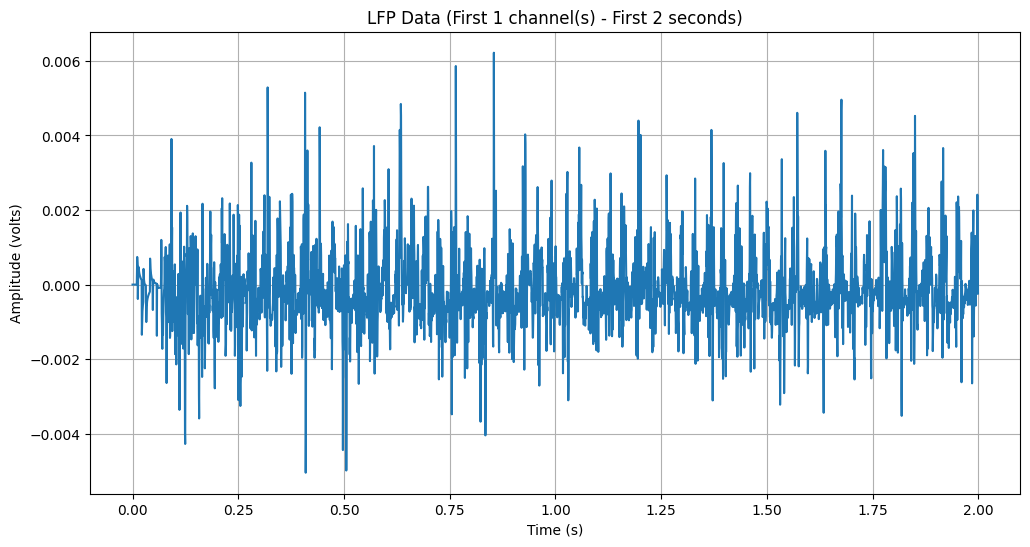

In [5]:
if "ecephys" in nwb.processing and \
   "LFP" in nwb.processing["ecephys"].data_interfaces and \
   "LFP" in nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series:

    lfp_es = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["LFP"]

    # Determine the number of samples for 2 seconds
    sampling_rate = lfp_es.rate
    num_samples_2_sec = int(2 * sampling_rate)

    # Check if the data has more than one dimension (i.e., multiple channels)
    # The tools_cli output showed LFP_1.data as shape (77400,), implying single channel data for this specific series object
    # However, ElectricalSeries can store multichannel data. If it were multichannel, it would be (num_samples, num_channels).
    # For this specific file, based on tools_cli output `LFP_1.data # (Dataset) shape (77400,); dtype float64`
    # it seems LFP_1.data is a 1D array, suggesting it might represent a single channel,
    # or channels are stored differently (e.g. multiple ElectricalSeries objects).
    # Let's assume it's a single trace for now as per the shape.

    if lfp_es.data.ndim == 1:
        # Single channel data
        lfp_data_subset = lfp_es.data[:num_samples_2_sec]
        num_channels_to_plot = 1
    elif lfp_es.data.ndim == 2:
        # Multi-channel data, take the first channel
        lfp_data_subset = lfp_es.data[:num_samples_2_sec, 0]
        num_channels_to_plot = 1 # We are plotting only the first channel
    else:
        print("LFP data has an unexpected number of dimensions. Skipping plot.")
        lfp_data_subset = None

    if lfp_data_subset is not None:
        # Create a time vector
        time_vector = np.arange(len(lfp_data_subset)) / sampling_rate

        plt.figure(figsize=(12, 6))
        plt.plot(time_vector, lfp_data_subset)
        plt.title(f"LFP Data (First {num_channels_to_plot} channel(s) - First 2 seconds)")
        plt.xlabel("Time (s)")
        plt.ylabel(f"Amplitude ({lfp_es.unit})")
        plt.grid(True)
        plt.show()
else:
    print("LFP data not found in the expected location. Skipping visualization.")

## Further Exploration of NWB Electrodes Table

The NWB file contains a table of all electrodes (`nwb.electrodes`). Let's display the first few rows of this table to understand what information is available. This table provides metadata for each electrode used in the recording. The `LFP` electrical series we plotted references a subset of these electrodes via its `electrodes` attribute (a `DynamicTableRegion`).

In [6]:
if nwb.electrodes is not None:
    print("Full electrodes table (nwb.electrodes):")
    electrodes_df = nwb.electrodes.to_dataframe()
    print(electrodes_df.head())

    print("\nColumns in the electrodes table:", list(nwb.electrodes.colnames))

    # Example: Accessing location of the first few electrodes
    print("\nLocation of the first 3 electrodes:")
    for i in range(min(3, len(electrodes_df))):
        print(f"  Electrode {electrodes_df.index[i]}: {electrodes_df['location'].iloc[i]}, Group: {electrodes_df['group_name'].iloc[i]}, Label: {electrodes_df['label'].iloc[i]}")
else:
    print("nwb.electrodes table is not available.")

Full electrodes table (nwb.electrodes):
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeGroup at 0x14024...     shank0  shank0_elec0  
1   shank0 pynwb.ecephys.ElectrodeGroup at 0x14024...     shank0  shank0_elec1  
2   shank0 pynwb.ecephys.ElectrodeGroup at 0x14024...     shank0  shank0_elec2  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x14024...     shank1  shank1_elec0  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x14024...     shank1  shank1_elec1  


## Summary and Future Directions

This notebook demonstrated how to:
- Connect to a DANDI Dandiset and retrieve its metadata.
- List assets within the Dandiset.
- Load a specific NWB file by its URL, using `remfile` for remote access.
- Explore basic metadata and structure of the NWB file, including processing modules, data interfaces, and electrical series for LFP data.
- Visualize a short segment of LFP data.
- Inspect the `nwb.electrodes` table which provides metadata for all recording electrodes.

### Possible Future Directions:
1.  **Analyze ARV (Average Rectified Voltage) Data:** This Dandiset also contains Beta ARV signals. One could load these signals (which are in the frequency domain) and compare them between healthy and parkinsonian subject simulations.
2.  **Detailed LFP Analysis:**
    *   Perform spectral analysis (e.g., Power Spectral Density) on LFP signals to identify characteristic oscillations, particularly in the beta band (13-30 Hz) which is a biomarker for Parkinson's Disease.
    *   Compare LFP features across different experimental conditions or subject groups if data from multiple subjects/conditions are analyzed.
3.  **Explore other NWB files:** This notebook focused on one NWB file. Similar analyses can be performed on other files in the Dandiset, especially those from the "parkinsonian-simulated" groups, to compare with the "healthy-simulated" data.
4.  **Correlate with Electrode Information:** Investigate if LFP characteristics vary systematically based on electrode location or group, using the information from the `nwb.electrodes` table.
5.  **Advanced Visualizations:** Create more sophisticated visualizations, such as spectrograms for time-frequency analysis of LFP data.

Remember to consult the Dandiset's description and related publications for more context on the data and experimental design.